In [5]:
import torch
torch.__version__

'1.13.1+cpu'

In [2]:
from torch.utils.data import Dataset, DataLoader
# transforms 전처리 때 사용하는 메소드

c:\USERS\DILAB\ANACONDA3\ENVS\DL\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


MNIST 데이터셋 가져오기

In [6]:
import torchvision.transforms as transforms
from torchvision import datasets

In [11]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=(0.5,),std=(1.0,))])

In [12]:
trainset = datasets.MNIST(root=r'C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛',
                          train=True, download=True, transform=mnist_transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 18005314.34it/s]


Extracting C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 1608707.75it/s]


Extracting C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 4228343.55it/s]


Extracting C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 4555363.17it/s]

Extracting C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\MNIST\raw



In [13]:
testset = datasets.MNIST(root=r'C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛',
                          train=False, download=True, transform=mnist_transform)

In [14]:
# 배치만큼 데이터 가지고 오기
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)

In [16]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape
# 28 x 28 이미지, 이미지 커널 1개이므로 흑백, batch size = 8

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [17]:
# 이미지 차원 축소, 0차원 축소 => 8개 배치 데이터 중 한 개만 가져옴
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

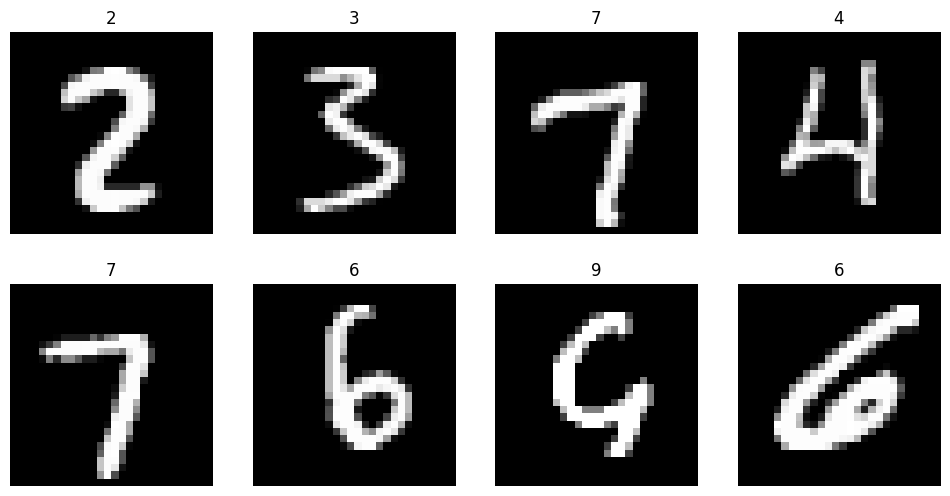

In [23]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,6))
cols, rows = 4, 2
for i in range(1, cols*rows + 1):
    sample_idx = torch.randint(len(trainset),size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray') # img.squeeze()를 통해 차원을 2차원을 맞춰줘야 한다.
plt.show()

신경망 구성
layer : 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
module : 한 개 이상의 계층이 모여서 구성
model : 한 개 이상의 모듈이 모여서 구성

torch.nn 패키지
가중치와 편향값들이 내부에서 자동으로 생성되는 레이어를 사용할 때 이용한다.

In [24]:
import torch.nn as nn

In [1]:
# 예제
input = torch.randn(128,20)
print(input)

m = nn.Linear(20,30)
print(m)

output = m(input)
print(output.size())

NameError: name 'torch' is not defined

In [ ]:
# 컨볼루션 예제
input = torch.randn(20,16,50,100)
